In [33]:
import matplotlib.pyplot
%matplotlib inline
import numpy

In [34]:
def draw(data_array):
    image_array = numpy.asfarray(data_array).reshape((28,28))
    matplotlib.pyplot.imshow(image_array , cmap='Greys', interpolation='None')

In [42]:
def number_file_to_data(filename):
    data_file = open(filename, 'r')
    data_list = data_file.readlines()
    data_file.close()
    data = []
    
    for i in range(0, len(data_list)):
        data.append(data_list[i].split(','))
        
    for i in range(0, len(data)):
        for j in range(0, len(data[i])):
            data[i][j] = int(data[i][j])
            
    return data

In [43]:
train_data = number_file_to_data('mnist_train.csv')

In [44]:
model_data = []
for i in range(0, 10):
    model_data.append([0]*784)
    
# train model
for i in range(0, len(train_data)):
    number = train_data[i][0]
    for j in range(1, len(train_data[i])):
        model_data[number][j-1] += train_data[i][j]
        
for i in range(0, 10):
    for j in range(0, len(model_data[i])):
        model_data[i][j] /= 6000

In [45]:
test_data = number_file_to_data('mnist_test.csv')

In [47]:
import math
def get_distance(model_data, test_array, target_number):
    square_sum = 0
    for i in range(0, 784):
        square_sum += (model_data[target_number][i] - test_array[i])**2
    return math.sqrt(square_sum)

In [77]:
def guess_with_distance(model_data, test_array):
    shortest = 0
    shortest_index = 0
    guess_array = [0]*10
    for i in range(0, 10):
        guess_array[i] = get_distance(model_data, test_array, i)
        # print(str(i), guess_array[i])
        
    shortest = guess_array[shortest_index]
    for i in range(1, 10):
        if shortest > guess_array[i]:
            shortest = guess_array[i]
            shortest_index = i
            
    return shortest_index

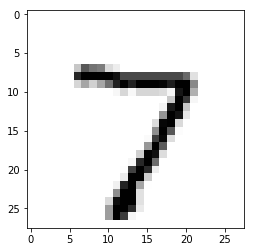

In [56]:
draw(test_data[0][1:])

In [75]:
guess_with_distance(model_data, test_data[0][1:])

0 2155.045705827198
1 2075.8750870294907
2 1995.5805573576686
3 1986.808953871201
4 1772.5587853981897
5 1805.4254992902404
6 2084.833001080935
7 1227.2161143235032
8 1939.277229191035
9 1632.0920486661607


7

In [59]:
def get_length(vector):
    square_sum = 0
    for i in range(0, len(vector)):
        square_sum += vector[i]**2
    return math.sqrt(square_sum)

def dot(vector_a, vector_b):
    sum = 0
    for i in range(0, len(vector_a)):
        sum += vector_a[i] * vector_b[i]
    return sum

def get_cos_angle(model_data, test_array, target_number):
    vector_a = model_data[target_number]
    vector_b = test_array
    length_a = get_length(vector_a)
    length_b = get_length(vector_b)
    a_dot_b = dot(vector_a, vector_b)
    return a_dot_b / (length_a * length_b)

In [93]:
def guess_with_angle(model_data, test_array):
    guess_array = [0]*10
    for i in range(0, 10):
        guess_array[i] = get_cos_angle(model_data, test_array, i)
        # print(str(i), guess_array[i])
        
    max = guess_array[0]
    max_index = 0
    for i in range(0, 10):
        if max < guess_array[i]:
            max = guess_array[i]
            max_index = i
    
    return max_index

In [61]:
guess_with_angle(model_data, test_data[0][1:])

0 0.4333436709643556
1 0.31571700638718875
2 0.436831973401912
3 0.4558379781788751
4 0.5150069440832323
5 0.4664410011004165
6 0.37881268089424985
7 0.7832451742374066
8 0.4821683874164904
9 0.6049932001226158


7

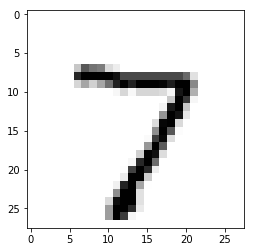

In [62]:
draw(test_data[0][1:])

In [65]:
def get_accuracy_distance(model_data, test_data):
    num_correct = 0
    for i in range(0, len(test_data)):
        if guess_with_distance(model_data, test_data[i][1:]) == test_data[i][0]:
            num_correct += 1
    return num_correct / len(test_data)

In [66]:
get_accuracy_distance(model_data, test_data) # 81.55%

0 2155.045705827198
1 2075.8750870294907
2 1995.5805573576686
3 1986.808953871201
4 1772.5587853981897
5 1805.4254992902404
6 2084.833001080935
7 1227.2161143235032
8 1939.277229191035
9 1632.0920486661607
0 2348.4942334478023
1 2261.0116852749106
2 2046.6490153184411
3 2094.0611315932115
4 2488.0059950408026
5 2102.08093401612
6 2104.547404802944
7 2567.1253186372905
8 2212.868662842917
9 2473.977818342888
0 2165.2330744912697
1 958.9844306781151
2 1681.7585356516774
3 1748.2374899260044
4 1735.9041340731649
5 1539.7690744028528
6 1769.834538705847
7 1734.9689040216092
8 1690.7945196441985
9 1725.2449259895354
0 1574.9156699765176
1 2662.8970520749945
2 2185.8186242772454
3 2212.1823296274897
4 2309.246564363718
5 2106.689795742937
6 1977.2787089995195
7 2201.4327158894985
8 2221.4791890372353
9 2212.15784095966
0 2121.1587129532722
1 2299.1672887409386
2 1888.4654790518705
3 2104.038418894193
4 1525.8782370684012
5 1872.9955410573589
6 1913.0896858388014
7 1846.9017331525638
8 1980.1

0.8155

In [71]:
def get_accuracy_angle(model_data, test_data):
    num_correct = 0
    for i in range(0, len(test_data)):
        if guess_with_angle(model_data, test_data[i][1:]) == test_data[i][0]:
            num_correct += 1
    return num_correct / len(test_data)

In [72]:
get_accuracy_angle(model_data, test_data) # 82.16%

0 0.4333436709643556
1 0.31571700638718875
2 0.436831973401912
3 0.4558379781788751
4 0.5150069440832323
5 0.4664410011004165
6 0.37881268089424985
7 0.7832451742374066
8 0.4821683874164904
9 0.6049932001226158
0 0.4909604409677963
1 0.4620168768415401
2 0.5926616310418725
3 0.5752275684035651
4 0.3288242896666429
5 0.5485155228372551
6 0.5642754428610723
7 0.3006798826098641
8 0.5202247494997413
9 0.35401267854258833
0 0.27957778539371464
1 0.7921328238026953
2 0.4685603701895649
3 0.4484386802353496
4 0.3270710285660349
5 0.40670526687110253
6 0.39844118429814823
7 0.3780283593186241
8 0.4872951544163104
9 0.3787485465050403
0 0.8509928812126315
1 0.41585317478142886
2 0.6603077541700033
3 0.6484534060236743
4 0.6109066126133587
5 0.7305642833796397
6 0.7453624058970444
7 0.65769560922031
8 0.6445922293371007
9 0.6534645544857143
0 0.4595689706255307
1 0.17313430755453132
2 0.5064834211507407
3 0.4011328747359625
4 0.6574085015467158
5 0.4382673897686025
6 0.48869763544030204
7 0.504

0.8216

In [95]:
def guess(model_data, test_array, angle_err):
    guess_array = [0]*10
    for i in range(0, 10):
        guess_array[i] = get_cos_angle(model_data, test_array, i)
        # print(str(i), guess_array[i])
        
    max = guess_array[0]
    for i in range(0, 10):
        if max < guess_array[i]:
            max = guess_array[i]
    
    for i in range(0, 10):
        guess_array[i] -= max
        
    next_guess_array = [-1]*10
    shortest = 10000000
    shortest_index = -1
    
    for i in range(0, 10):
        if guess_array[i] > -angle_err:
            next_guess_array[i] = get_distance(model_data, test_array, i)
            if next_guess_array[i] < shortest:
                shortest = next_guess_array[i]
                shortest_index = i
            
    return shortest_index

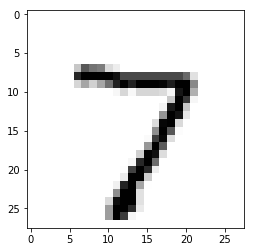

In [79]:
draw(test_data[0][1:])

In [96]:
guess(model_data, test_data[0][1:], 0.2)

7

In [97]:
def get_accuracy(model_data, test_data, angle_err):
    num_correct = 0
    for i in range(0, len(test_data)):
        if guess(model_data, test_data[i][1:], angle_err) == test_data[i][0]:
            num_correct += 1
    
    return num_correct / len(test_data)

In [99]:
get_accuracy(model_data, test_data, 0.2) # 81.55% same as the accuracy for guess_with_distance()

0.8155

In [100]:
get_accuracy(model_data, test_data, 0.05)

0.8211

In [101]:
err = 0
for i in range(1, 10):
    print(str(i*0.01), get_accuracy(model_data, test_data, i*0.01))

0.01 0.8246
0.02 0.8245
0.03 0.8227
0.04 0.8218
0.05 0.8211
0.06 0.8194
0.07 0.8187
0.08 0.8178
0.09 0.817


In [102]:
err = 0
for i in range(1, 10):
    print(str(i*0.001), get_accuracy(model_data, test_data, i*0.001))

0.001 0.8219
0.002 0.8228
0.003 0.8236
0.004 0.8238
0.005 0.8241
0.006 0.8248
0.007 0.8248
0.008 0.8247
0.009000000000000001 0.8246
